In [61]:
import numpy as np
import pyslsa
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
class TPEnv:
    
    def __init__(self, n_holes, hole_rad):
        self.xlim = [-1, 1]
        self.ylim = [-1, 1]
        self.holes = 2*np.random.rand(n_holes, 2) - 1  # keep centers in range -1, 1
        self.hole_rad = hole_rad # radius of holes
        
    def in_hole(self, x, y):
        for hole in self.holes:
            if np.linalg.norm(np.subtract([x, y], hole)) < self.hole_rad:
                return True
        return False
        
 

In [197]:
def generate_paths(space, n_steps, ntrials, dl):
    # pick a starting point
    final_pts = np.zeros((ntrials, n_steps, 2))
    for trial in range(ntrials):
        pts = []
        pt = (2*np.random.rand(1, 2) - 1)[0]
        #pts.append(pt)
        steps_to_go = n_steps
        while steps_to_go > 0:

            # pick a new point
            theta = 2*np.pi*np.random.rand(1)[0]
            dx = dl*np.cos(theta)
            dy = dl*np.sin(theta)

            if (abs(pt[0]+dx) < 1 and 
               abs(pt[1]+dy) < 1 and
                not space.in_hole(pt[0]+dx, pt[1]+dy)):

                steps_to_go -= 1

                pt[0] = pt[0] + dx
                pt[1] = pt[1] + dy
                pts.append(np.copy(pt))
        pts = np.vstack(pts)
        final_pts[trial, :, :] = pts
    return final_pts

def generate_place_fields(n_fields, rad):
    
    centers =2*np.random.rand(n_fields, 2) - 1
    return (centers, rad)

def generate_spikes(paths, fields, max_rate, sigma):
    
    ncell, dim = fields.shape
    ntrial, nwin, _ = paths.shape
    
    spikes = np.zeros((ncell, nwin, ntrial))

    P1 = paths[:, :, np.newaxis, :]
    C1 = fields[np.newaxis, np.newaxis, :, :]

    P1 = np.tile(P1, [1, 1, ncell, 1])
    C1 = np.tile(C1, [ntrial, nwin, 1, 1])

    S = P1 - C1
    M = np.einsum('ijkl, ijkl->ijk', S, S)
    probs = max_rate*np.exp(-1*M / (2*sigma**2))
    spikes = 1*np.greater(probs, np.random.random(np.shape(probs)))
    return np.einsum('ijk->kji', spikes)

In [194]:
test = TPEnv(1, 0.1)

In [31]:
test.in_hole(-0.94, 0.2)

False

In [79]:
test.holes

array([[ 0.83983873,  0.45185942]])

(-1, 1)

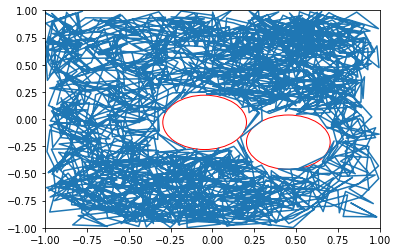

In [204]:
test = TPEnv(2, 0.25)
pth = generate_paths(test, 2000, 10, 0.2)
(fields, rad) = generate_place_fields(20, 1)
spikes = generate_spikes(pth, fields, 0.5, 1.0)

plt.plot(pth[0, :, 0], pth[0, :, 1])
ax = plt.gca()
for hole in test.holes:
    
    h1 = plt.Circle(hole, test.hole_rad, fill=False, color='r')
    ax.add_artist(h1)
plt.xlim([-1, 1])
plt.ylim([-1, 1])

In [199]:
spikes.shape

(20, 2000, 10)

In [179]:
ntrial = 10
nwin = 20
dim = 2
ncell = 30
sigma = 1.
maxrate = 0.3

P = np.random.rand(ntrial, nwin, dim)
C = np.random.rand(ncell, dim)

P1 = P[:, :, np.newaxis, :]
C1 = C[np.newaxis, np.newaxis, :, :]

P1 = np.tile(P1, [1, 1, ncell, 1])
C1 = np.tile(C1, [ntrial, nwin, 1, 1])

S = P1 - C1
M = np.einsum('ijkl, ijkl->ijk', S, S)
probs = maxrate*np.exp(-1*M / (2*sigma**2))
spikes = 1*np.greater(probs, np.random.random(np.shape(probs)))

In [180]:
spikes[0, :, 0]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [181]:
probs[0, :, 0]

array([ 0.21621902,  0.21814607,  0.2402829 ,  0.24926492,  0.2926243 ,
        0.24045045,  0.22091153,  0.17603371,  0.29720788,  0.2366107 ,
        0.28379617,  0.26134034,  0.21713582,  0.24152172,  0.23283497,
        0.21205341,  0.26481805,  0.22107309,  0.18664043,  0.27716351])

In [154]:
S[0,0,0,0]

-0.058706516733177505